In [30]:
# Makes report plot
# improt and define basic params
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from pathlib import Path
from os import listdir, path, makedirs
sns.set(style="darkgrid")

mpl.rcParams["savefig.dpi"] = 200
# Calibrated data dir
calibrated_base_dir = Path("..")/"../new_calibrate_full/"
uncalibrated_base_dir = Path("..")/"../uncalibrated_data/"
calibration_curve_base_dir = Path("..")/"../calibration_curve/"
calibrated_table_dir = Path("..")/"../tables/"
uncalibrated_table_dir = Path("..")/"../uncalibrated_tables/"
sns.set(font_scale=1.2)

# Class to use
import sys
sys.path.append("../../python")
from auditing_setup.election_setting import Election
%matplotlib inline

In [2]:
# Import library for visualization
import sys
sys.path.append("../../python")
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
from os import listdir, path, makedirs
from auditing_setup.election_setting import Election
from collections import defaultdict

In [3]:
base_path = "../../sample_size/"

# We parse the file structure into a dictionary/pandas dataframe
def parse_election_name_to_object(election_string):
    election_params = {}
    for election_pair in election_string.split("_"):
        key, value = election_pair.split("=")
        election_params[key] = eval(value.lstrip("0"))
    return Election(**election_params)

def parse_data_dir(data_dir):
    data_dir_df = pd.DataFrame()
    df_dict = defaultdict(pd.DataFrame)
    for election_dir_file in listdir(data_dir):
        election = parse_election_name_to_object(election_dir_file)
        for data_dir_file in listdir(path.join(data_dir, election_dir_file)):
            for data_file in listdir(path.join(data_dir, election_dir_file, data_dir_file)):
                key = data_file.replace(".csv","")
                data_file = path.join(data_dir, election_dir_file, data_dir_file, data_file)
                data = pd.read_csv(data_file, header=0)
                try:
                    for i, row in data.iterrows():
                        row.name = election
                        legend = "_".join(row["legend"].split(" | ")[:-1])
                        df_dict[key] = df_dict[key].append(row)
                except:
                    pass
    for df in df_dict.values():
        cols = []
        for i in df.columns:
            try:
                cols.append(float(i))
            except Exception as e:
                cols.append(i)
        df.columns = cols
        df.index.set_names("election", inplace=True)
        df = df.assign(f = [idx.m for idx in df.index]).sort_values('f', ascending=False).drop('f', axis=1)
    return df_dict

In [4]:
df_dict = parse_data_dir(base_path)

In [5]:
for key, df in df_dict.items():
    df.to_csv('../../max_sample_size_table/{}.csv'.format(key))

In [34]:
legend_order = ['bravo    | p=0.7 ',
                'bravo    | p=0.55 ',
                'bravo    | p=0.52 ',
                'bravo    | p=0.51 ',
                'bravo_without_replacement | p=0.7 ',
                'bravo_without_replacement | p=0.55 ',
                'bravo_without_replacement | p=0.52 ',
                'bravo_without_replacement | p=0.51 ',
                'bayesian | a=1 | b=1 ',
                'bayesian_with_replacement | a=1 | b=1 ',
                'truncated_bayesian | a=1 | b=1 ',
                'clip     ', 
                'max_sprt ']

def get_position(name):
    for i, legend_pattern in enumerate(legend_order):
        if name.lower().startswith(legend_pattern):
            return i
    else:
        print(name)
        assert False

def reorder_df(df):
    return df.loc[sorted(df.index, key=get_position)]

mpl.rcParams["figure.figsize"] = [8, 6]

def read_csv(file_path, reorder=True):
    df = pd.read_csv(file_path)
    cols = []
    for i in df.columns:
        try:
            cols.append(float(i))
        except Exception as e:
            cols.append(i)
    df.columns = cols
    df.set_index('legend', inplace=True)
    if reorder:
        df = reorder_df(df)
    return df.reset_index()

def get_num_cols(df):
    cols = []
    for i in df.columns:
        try:
            float(i)
            cols.append(float(i))
        except Exception as e:
            pass
    return cols

def format_legend(ax=None, legend=None, how=0):
    if ax is not None:
        legend_ = ax.legend_
    elif legend is not None:
        legend_ = legend
    else:
        return
    
    for text in legend_.texts:
        if how == 0:
            raw = text.get_text()
            text.set_text(raw.replace(" | ", ", ").replace(" ", "").rsplit(",", 1)[0])
        elif how == 1:
            raw = text.get_text()
            print(raw.rsplit(",", 1)[0].replace("_", " "))
            text.set_text(raw.rsplit(",", 1)[0].replace("_", " "))
    return legend_

def make_legend(df, ax, outside=False, *args, **kwargs):
    if outside:
        d = dict(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        kwargs.update(d)
    ax.legend(labels=['maximum sample size: {}'.format(m) for m in 
                      df['m'].drop_duplicates()], 
             *args, **kwargs)

In [7]:
cols = sns.color_palette("bright", 6)

cs_dict = {'bayesian | a=1 | b=1':cols[0],
           'bayesian_with_replacement | a=1 | b=1':cols[0],
           'bravo    | p=0.55':cols[1],
           'bravo    | p=0.7':cols[1],
           'bravo_without_replacement | p=0.55':cols[2],
           'bravo_without_replacement | p=0.7':cols[2],
           'clip    ':cols[3], 
           'max_sprt':cols[4],
           'truncated_bayesian | a=1 | b=1':cols[5]}

# ls_dict = {'bayesian | a=1 | b=1':'-',
#            'bayesian_with_replacement | a=1 | b=1':'--',
#            'bravo    | p=0.55':'-',
#            'bravo    | p=0.7':'--',
#            'bravo_without_replacement | p=0.55':'-',
#            'bravo_without_replacement | p=0.7':'--',
#            'clip    ':'--', 
#            'max_sprt':'--',
#            'truncated_bayesian | a=1 | b=1':'--'}
ls_dict = {'bayesian | a=1 | b=1':'-',
           'bayesian_with_replacement | a=1 | b=1':'-',
           'bravo    | p=0.55':'-',
           'bravo    | p=0.7':'-',
           'bravo_without_replacement | p=0.55':'-',
           'bravo_without_replacement | p=0.7':'-',
           'clip    ':'-', 
           'max_sprt':'-',
           'truncated_bayesian | a=1 | b=1':'-'}

ms_dict = {'bayesian | a=1 | b=1':'o',
           'bayesian_with_replacement | a=1 | b=1':'s',
           'bravo    | p=0.55':'<',
           'bravo    | p=0.7':'>',
           'bravo_without_replacement | p=0.55':'P',
           'bravo_without_replacement | p=0.7':'X',
           'clip    ':'o', 
           'max_sprt':'o',
           'truncated_bayesian | a=1 | b=1':'o'}

In [8]:
def map_styles(legends):
    cs, ls, ms = [], [], []
    for legend in legends:
        legend = legend.rsplit(" | ", 1)[0]
        ls.append(ls_dict[legend])
        cs.append(cs_dict[legend])
        ms.append(ms_dict[legend])
    return cs, ls, ms

In [9]:
def pivot_widetable(df, names, groupers, *args, **kwargs):
    df_long = df.melt(*args, **kwargs)
    for name, grouper in zip(names, groupers):
        group = [grouper(i) for i in df_long['variable']]
        df_long[name] = group
    return df_long

names = [
    'type'
    'basename'
    'basename_with_type'
    'parameter'
    'parameter_with_type'
]

basename_map = {'bayesian ': 'Bayesian',
                'max_sprt ': 'MaxBRAVO',
                'bravo    ': 'BRAVO',
                'clip     ': 'ClipAudit',
                'bravo_without_replacement ': 'BRAVO',
                'truncated_bayesian ': 'Bayesian (Least Favourable)',
                'bayesian_with_replacement ': 'Bayesian'}

type_map = {'bayesian ': 'Uniform',
            'max_sprt ': '',
            'bravo    ': 'Binomial',
            'clip     ': '',
            'bravo_without_replacement ': 'Hypergeometric',
            'truncated_bayesian ': '',
            'bayesian_with_replacement ': 'Beta'}

basename_map_with_type = {'bayesian ': 'Bayesian (Uniform)',
                          'max_sprt ': 'MaxBRAVO',
                          'bravo    ': 'BRAVO (Binomial)',
                          'clip     ': 'ClipAudit',
                          'bravo_without_replacement ': 'BRAVO (Hypergeometric)',
                          'truncated_bayesian ': 'Bayesian (Least Favourable)',
                          'bayesian_with_replacement ': 'Bayesian (Beta)'}

def group_basename(name):
    name = name.split('|')[0]
    return basename_map[name]

def group_type(name):
    name = name.split('|')[0]
    return type_map[name]

def group_basename_with_type(name):
    name = name.split('|')[0]
    return basename_map_with_type[name]

def group_parameter(name):
    _, name = name.split('|', 1)
    name = name.rsplit('|', 1)[0] if len(name.rsplit('|', 1)) > 1 else ''
    name = name.replace('|', ',')
    name = name.replace(' ', '')
    return name

def group_parameter_with_type(name):
    _, name = name.split('|', 1)
    type = group_type(_)
    name = name.rsplit('|', 1)[0] if len(name.rsplit('|', 1)) > 1 else ''
    name = name.replace('|', ',')
    name = name.replace(' ', '')
    return type+' '+name
    
groupers = [
    group_type,
    group_basename,
    group_basename_with_type,
    group_parameter,
    group_parameter_with_type
]

filled_markers = (
    'o', 'v', '^', '<', '>', '*', 's', '8', 'H', 'p','D', 'X', 'd', 'P')
# ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
dash_styles = [
    "",
    (4, 1.5),
    (1, 1),
    
    "",
    (4, 1.5),
    (1, 1),
    
    "",
    (5, 1, 1, 1),
    
    (2, 2, 3, 1.5),
    (1, 2.5, 3, 1.2),
    (5, 1, 2, 1, 2, 1),
]

In [10]:
def prep_long_df(df):
    data_long = pivot_widetable(df, [], [], id_vars=['legend', 'election'], 
                                var_name='p', value_name='expected_sample')
    types = data_long.legend.apply(group_type)
    basenames = data_long.legend.apply(group_basename)
    parameters = data_long.legend.apply(group_parameter)
    basenames_with_type = data_long.legend.apply(group_basename_with_type)
    parameters_with_type = data_long.legend.apply(group_parameter_with_type)
    data_long['type'] = types
    data_long['basename'] = basenames
    data_long['basename_with_type'] = basenames_with_type
    data_long['parameter'] = parameters
    data_long['parameter_with_type'] = parameters_with_type
    data_long['fullname'] = basenames_with_type + ' ' + parameters
    
    m = [int(i[1].replace('m=', '')) for i in data_long.election.str.split('_', 2)]
    data_long['m'] = m
    data_long['p'] = data_long['p'].astype(np.float16)
    return data_long

# Making report plot 

### BRAVO 055

In [ ]:
# import data
# bravo
fig = plt.figure(figsize=[9, 12])


ax = fig.add_subplot(311)
data = pd.read_csv('../../max_sample_size_table/bravo_without_replacement_power.csv')
data = prep_long_df(data)
data = data.query('parameter=="p=0.55"')
data = data.sort_values(['m', 'p'])

sns.lineplot(
    x = 'p',
    y = 'expected_sample',
    hue = 'm',
    size = 'm',
    style = 'm',
    data=data,
    markers=filled_markers, 
    dashes=False,
    palette=sns.color_palette("Blues", 25)[-13:], 
    legend=False, 
    sizes=(1, 1.5),
    ax=ax)
# make_legend(data, ax, bbox_to_anchor=(0.58, 0.3), loc=2, borderaxespad=0.)
d = dict(bbox_to_anchor=(0.8, 0.9), loc=2, borderaxespad=0.)
make_legend(data, ax, **d)
ax.xaxis.set_visible(False)
ax.set_ylabel("Power")
ax.set_zorder(-1)
ax.set_xlim(0.49, 0.60)
plt.title(str(data.loc[0, 'fullname']) + " with different maximum allowed sample sizes")

ax = fig.add_subplot(312)

data = pd.read_csv('../../max_sample_size_table/bravo_without_replacement_unconditional_mean.csv')
data = prep_long_df(data)
data = data.query('parameter=="p=0.55"')
data = data.sort_values(['m', 'p'])

sns.lineplot(
    x = 'p',
    y = 'expected_sample',
    hue = 'm',
    size = 'm',
    style = 'm',
    data=data,
    markers=filled_markers, 
    dashes=False,
    palette=sns.color_palette("Blues", 25)[-13:], 
    legend=False, 
    sizes=(1, 1.5),
    ax=ax)
ax.xaxis.set_visible(False)
ax.set_ylabel("Expected sample size")
ax.set_zorder(-1)
ax.set_xlim(0.49, 0.60)


ax = fig.add_subplot(313)

data = pd.read_csv('../../max_sample_size_table/bravo_without_replacement_unconditional_mean_with_recount.csv')
data = prep_long_df(data)
data = data.query('parameter=="p=0.55"')
data = data.sort_values(['m', 'p'])

sns.lineplot(
    x = 'p',
    y = 'expected_sample',
    hue = 'm',
    size = 'm',
    style = 'm',
    data=data,
    markers=filled_markers, 
    dashes=False,
    palette=sns.color_palette("Blues", 25)[-13:], 
    legend=False, 
    sizes=(1, 1.5),
    ax=ax)
plt.axvline(0.50, color='r')
plt.axvline(0.55, color='r')

ax.set_xlabel("True proportion")
ax.set_ylabel("Expected sample size with recount")
ax.set_zorder(-1)
ax.set_xlim(0.49, 0.60)

plt.tight_layout()
plt.savefig('../../figures/maximum_sample_size_bravo055.png')

### BRAVO 052

In [ ]:
# import data
# bravo
fig = plt.figure(figsize=[9, 12])


ax = fig.add_subplot(311)
data = pd.read_csv('../../max_sample_size_table/bravo_without_replacement_power.csv')
data = prep_long_df(data)
data = data.query('parameter=="p=0.52"')
data = data.sort_values(['m', 'p'])

sns.lineplot(
    x = 'p',
    y = 'expected_sample',
    hue = 'm',
    size = 'm',
    style = 'm',
    data=data,
    markers=filled_markers, 
    dashes=False,
    palette=sns.color_palette("Blues", 25)[-13:], 
    legend=False, 
    sizes=(1, 1.5),
    ax=ax)
# make_legend(data, ax, bbox_to_anchor=(0.58, 0.3), loc=2, borderaxespad=0.)
d = dict(bbox_to_anchor=(0.8, 0.9), loc=2, borderaxespad=0.)
make_legend(data, ax, **d)
ax.xaxis.set_visible(False)
ax.set_ylabel("Power")
ax.set_xlim(0.49, 0.60)
ax.set_zorder(-1)
plt.title(str(data.loc[:,'fullname'].iloc[0]) + " with different maximum allowed sample sizes")

ax = fig.add_subplot(312)

data = pd.read_csv('../../max_sample_size_table/bravo_without_replacement_unconditional_mean.csv')
data = prep_long_df(data)
data = data.query('parameter=="p=0.52"')
data = data.sort_values(['m', 'p'])

sns.lineplot(
    x = 'p',
    y = 'expected_sample',
    hue = 'm',
    size = 'm',
    style = 'm',
    data=data,
    markers=filled_markers, 
    dashes=False,
    palette=sns.color_palette("Blues", 25)[-13:], 
    legend=False, 
    sizes=(1, 1.5),
    ax=ax)
ax.xaxis.set_visible(False)
ax.set_ylabel("Expected sample size")
ax.set_xlim(0.49, 0.60)
ax.set_zorder(-1)


ax = fig.add_subplot(313)

data = pd.read_csv('../../max_sample_size_table/bravo_without_replacement_unconditional_mean_with_recount.csv')
data = prep_long_df(data)
data = data.query('parameter=="p=0.52"')
data = data.sort_values(['m', 'p'])

sns.lineplot(
    x = 'p',
    y = 'expected_sample',
    hue = 'm',
    size = 'm',
    style = 'm',
    data=data,
    markers=filled_markers, 
    dashes=False,
    palette=sns.color_palette("Blues", 25)[-13:], 
    legend=False, 
    sizes=(1, 1.5),
    ax=ax)
plt.axvline(0.50, color='r')
plt.axvline(0.52, color='r')

ax.set_xlabel("True proportion")
ax.set_ylabel("Expected sample size with recount")
ax.set_xlim(0.49, 0.60)
ax.set_zorder(-1)

plt.tight_layout()
plt.savefig('../../figures/maximum_sample_size_bravo052.png')

### Bayesian

In [ ]:
# import data
# bravo
fig = plt.figure(figsize=[16, 8])


ax = fig.add_subplot(311)
data = pd.read_csv('../../max_sample_size_table/bayesian_power.csv')
data = prep_long_df(data)
# data = data.query('parameter=="p=0.55"')
data = data.sort_values(['m', 'p'])

sns.lineplot(
    x = 'p',
    y = 'expected_sample',
    hue = 'm',
    size = 'm',
    style = 'm',
    data=data,
    markers=filled_markers, 
    dashes=False,
    palette=sns.color_palette("Oranges", 25)[-13:], 
    legend=False, 
    sizes=(1, 1.5),
    ax=ax)
# make_legend(data, ax, bbox_to_anchor=(0.58, 0.3), loc=2, borderaxespad=0.)
d = dict(bbox_to_anchor=(0.8, 0.9), loc=2, borderaxespad=0.)
make_legend(data, ax, **d)
ax.xaxis.set_visible(False)
ax.set_ylabel("Power")
ax.set_xlim(0.49, 0.60)
ax.set_zorder(-1)
plt.title(str(data.loc[0, 'fullname']) + " with different maximum allowed sample sizes")

ax = fig.add_subplot(312)

data = pd.read_csv('../../max_sample_size_table/bayesian_unconditional_mean.csv')
data = prep_long_df(data)
data = data.sort_values(['m', 'p'])

sns.lineplot(
    x = 'p',
    y = 'expected_sample',
    hue = 'm',
    size = 'm',
    style = 'm',
    data=data,
    markers=filled_markers, 
    dashes=False,
    palette=sns.color_palette("Oranges", 25)[-13:], 
    legend=False,
    sizes=(1, 1.5),
    ax=ax)
ax.xaxis.set_visible(False)
ax.set_ylabel("Expected sample size")
ax.set_xlim(0.49, 0.60)
ax.set_zorder(-1)


ax = fig.add_subplot(313)

data = pd.read_csv('../../max_sample_size_table/bayesian_unconditional_mean_with_recount.csv')
data = prep_long_df(data)
data = data.sort_values(['m', 'p'])
data['maximum sample size = '] = data['m']
sns.lineplot(
    x = 'p',
    y = 'expected_sample',
    hue = 'maximum sample size = ',
    size = 'maximum sample size = ',
    style = 'maximum sample size = ',
    data=data,
    markers=filled_markers, 
    dashes=False,
    palette=sns.color_palette("Oranges", 25)[-13:], 
    legend=False,
    sizes=(1, 1.5),
    ax=ax)

ax.set_xlabel("True proportion")
ax.set_ylabel("Expected sample size with recount")
ax.set_xlim(0.49, 0.60)
ax.set_zorder(-1)

plt.tight_layout()

(0.49, 0.6)

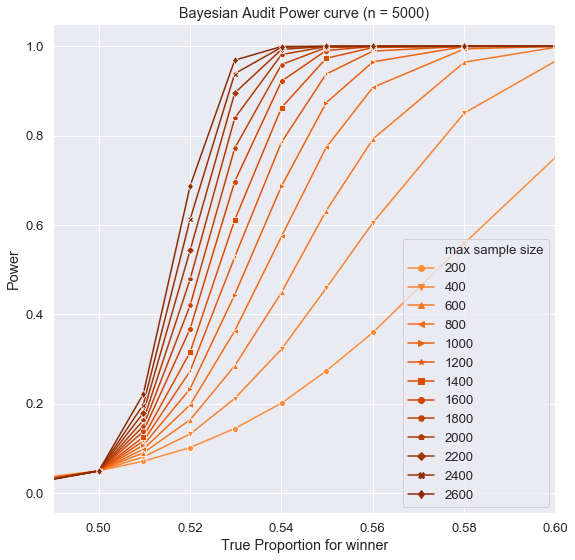

In [45]:
data = pd.read_csv('../../max_sample_size_table/bayesian_power.csv')
data = prep_long_df(data)
# data = data.query('parameter=="p=0.55"')
data = data.sort_values(['m', 'p'])


fig = plt.figure(figsize=[9, 9])
ax = fig.add_subplot(111)
data['max sample size'] = data['m']
sns.lineplot(
    x = 'p',
    y = 'expected_sample',
    hue = 'max sample size',
    style = 'max sample size',
    data=data,
    markers=filled_markers, 
    dashes=False,
    palette=sns.color_palette("Oranges", 25)[-13:], 
    ax=ax)

ax.set_title('Bayesian Audit Power curve (n = 5000)')
ax.set_xlabel("True Proportion for winner")
ax.set_ylabel("Power")
ax.set_xlim(0.49, 0.60)

(0.49, 0.6)

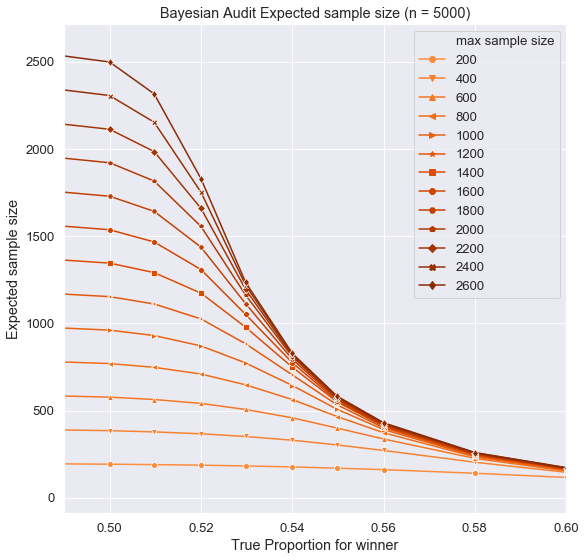

In [46]:
data = pd.read_csv('../../max_sample_size_table/bayesian_unconditional_mean.csv')
data = prep_long_df(data)
# data = data.query('parameter=="p=0.55"')
data = data.sort_values(['m', 'p'])


fig = plt.figure(figsize=[9, 9])
ax = fig.add_subplot(111)
data['max sample size'] = data['m']
sns.lineplot(
    x = 'p',
    y = 'expected_sample',
    hue = 'max sample size',
    style = 'max sample size',
    data=data,
    markers=filled_markers, 
    dashes=False,
    palette=sns.color_palette("Oranges", 25)[-13:], 
    ax=ax)

ax.set_title('Bayesian Audit Expected sample size (n = 5000)')
ax.set_xlabel("True Proportion for winner")
ax.set_ylabel('Expected sample size')
ax.set_xlim(0.49, 0.60)

(0.49, 0.6)

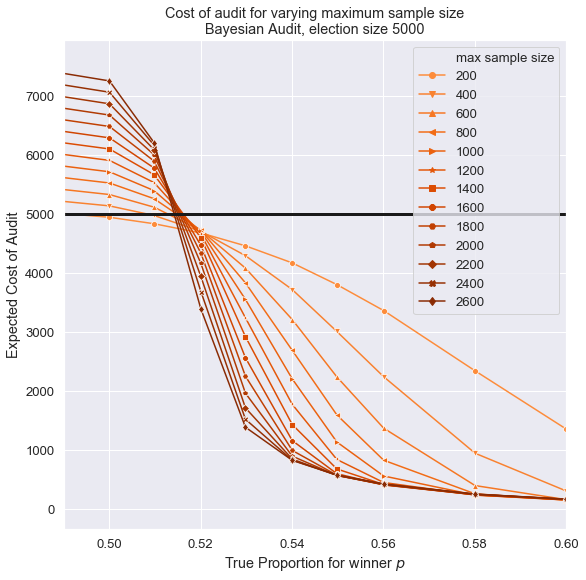

In [53]:
data = pd.read_csv('../../max_sample_size_table/bayesian_unconditional_mean_with_recount.csv')
data = prep_long_df(data)
# data = data.query('parameter=="p=0.55"')
data = data.sort_values(['m', 'p'])


fig = plt.figure(figsize=[9, 9])
ax = fig.add_subplot(111)
data['max sample size'] = data['m']
sns.lineplot(
    x = 'p',
    y = 'expected_sample',
    hue = 'max sample size',
    style = 'max sample size',
    data=data,
    markers=filled_markers, 
    dashes=False,
    palette=sns.color_palette("Oranges", 25)[-13:], 
    ax=ax)

ax.axhline(5000, c='k', linewidth=3)

ax.set_title('Cost of audit for varying maximum sample size\nBayesian Audit, election size 5000')
ax.set_xlabel("True Proportion for winner $p$")
ax.set_ylabel("Expected Cost of Audit")
ax.set_xlim(0.49, 0.60)